# First data analysis development.
 Done by Aditya Pidaparti
 Begun on Mar 14, 2018

### Imports first

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Initial plotting of one dataset

In [4]:
#Setup
data_file = '../rejection/nyse-o/compare_100/Compare_100_2018-01-17 20:01:05'
first = pd.read_csv(data_file)

first.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       Unnamed: 0  Beta Range       Alpha       Gamma         Eta    Max Risk  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    49.500000  109.830000    0.177500    0.003820    0.709000    0.936500   
std     29.011492   85.724607    0.138056    0.003662    0.452177    0.293004   
min      0.000000   21.000000    0.000000    0.000000    0.000000    0.500000   
25%     24.750000   42.000000    0.050000    0.000750    0.300000    0.650000   
50%     49.500000   63.000000    0.150000    0.002500    0.700000    0.950000   
75%     74.250000  126.000000    0.300000    0.005000    1.000000    1.200000   
max     99.000000  252.000000    0.400000    0.010000    1.500000    1.450000   

           Wealth  No Risk Wealth  
count  100.000000    1.000000e+02  
mean    23.904762    1.687845e+01  
std     12.186713    1.180324e+01  
min      0.127030    5.513944e-07  
25%     16.290157    9.161609e+00  
50%     26.670504    1.457433e+01  
75%     26.670504 

In [3]:
first['Difference'] = (first['No Risk Wealth'] - first['Wealth'])#/first['No Risk Wealth']
# first['Difference'] = first['Difference'].apply()

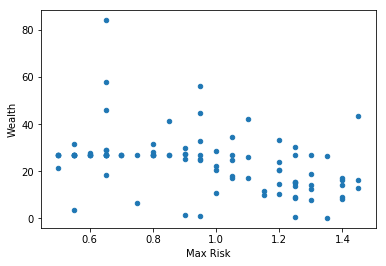

In [4]:
first.plot.scatter(x='Max Risk',y='Wealth')
plt.show()

Given that the data is so variable and bunched at certain risks, might want to decrease step size and take more data points. To show relative differences when wealth goes to zero, might want to clean and extract data to remove data points where wealth goes to zero.

## Extraing basic plots from ALL data

The next step is to compute results from all data. First, the results from all datasets with 100 tests will be aggregated. However, this sampling was done with replacement, so if there is significant overlap, the duplicate results will be removed.

In [5]:
import glob

In [6]:
path ='../rejection/nyse-o/compare_100/'
files = glob.glob(path + '*')
frame = pd.DataFrame()

data_list = []
for file in files:
    df = pd.read_csv(file,index_col=None, header=0)
    data_list.append(df)

all_data = pd.concat(data_list)

print(all_data.describe())

       Unnamed: 0   Beta Range        Alpha        Gamma          Eta  \
count   1100.0000  1100.000000  1100.000000  1100.000000  1100.000000   
mean      49.5000   101.067273     0.203045     0.003646     0.771455   
std       28.8792    81.697967     0.128961     0.003530     0.457933   
min        0.0000    21.000000     0.000000     0.000000     0.000000   
25%       24.7500    42.000000     0.100000     0.001000     0.400000   
50%       49.5000    63.000000     0.200000     0.002500     0.800000   
75%       74.2500   126.000000     0.300000     0.005000     1.200000   
max       99.0000   252.000000     0.400000     0.010000     1.500000   

          Max Risk       Wealth  No Risk Wealth  
count  1100.000000  1100.000000    1.100000e+03  
mean      0.974727    23.240022    1.666299e+01  
std       0.289351    11.329711    1.095889e+01  
min       0.500000     0.000140    1.888940e-07  
25%       0.750000    15.051585    1.084368e+01  
50%       1.000000    26.598582    1.41621

Now we have got all our data into 1 dataframe. Time to plot

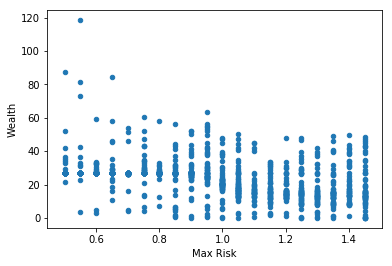

In [7]:
all_data['Difference'] = (all_data['No Risk Wealth'] - all_data['Wealth'])

all_data.plot.scatter(x='Max Risk',y='Wealth')
plt.show()

A first analysis shows that limitation of beta accraully results in an *increase* in variability, but also limits the number of subpar returns. However, random sampling could have caused this. Will perform additional testing on the low-end of risk to assess results.